<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 01** | SQL: Base de dados & Linguagem SQL
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Google Colab;</li>
  <li>Bases de dados relacionais;</li>
  <li>Introdução ao SQL;</li>
  <li>Introdução ao AWS Console;</li>
  <li>Armazenamento de dados com AWS S3;</li>
  <li>Computação em SQL com AWS Athena.</li>
</ol>

---

# **Aulas**

## 1\. Introdução ao Google Colab

> Ferramenta web autogerênciada de cadernos (*notebooks*).

### **1.1. Ferramenta web** 



*   Crie uma conta Google em [gmail.com](https://gmail.com);
*   Acesse o Google Colab através do endereço [colab.research.google.com](https://colab.research.google.com/).




### **1.2. Autogerênciada** 



*   A Google provisiona uma máquina virtual para você;
*   A máquina virtual dura no máximo 12h.



### **1.3. Cadernos (*notebooks*)** 

Um **caderno** é um documento *web* composto por um conjunto de elementos (células) de texto e código:


*   Células de **texto** podem ser editados com o editor da ferramenta, HTML ou Markdown; 
*   ~Células de **código** são exclusivamente para a linguagem de programação Python~.



## 2\. Bases de Dados Relacionais

### **2.1. Físico** 

Conceitos relacionados ao armazenamento físico dos dados.

 - Sistema Gerenciador de Base de Dados (SGBD)

> Software que gerencia o armazenamento físico de dados. 

Alguns exemplos:

- [MySQL](https://www.mysql.com/);
- [PostgreSQL](https://www.postgresql.org/);
- [MariaDB](https://mariadb.org/);
- [Oracle](https://www.oracle.com/br/index.html)

### **2.2. Lógico** 

Conceitos relacionados a organização lógica dos dados.

- Tabela

> Estrutura lógica e tabular de dados organizados em linhas e colunas.

- Base de Dado

> Conjunto lógico de tabelas.

## 3\. Introdução ao SQL

### **3.1. Definição** 

A linguagem de consulta estruturada, do inglês *structured query language* ou SQL, é uma linguagem de programação declarativa para interação com os dados armazenados nas tabelas de uma base de dados. Existe uma versão padrão do SQL registrada no ANSI, mas cada SGBD tem a sua própria versão.

Os códigos SQL são conhecidos como *queries* e são divididas em dois grandes grupos:

 - **DDL**: Linguagem de definição de dados;
 - **DML**: Linguagem de manipulação de dados.

Para exemplificar esses conceitos, vamos utilizar a tabela abaixo, com dados de clientes de uma instituição financeira.

| id        | idade | sexo | dependentes | escolaridade | tipo_cartao | limite_credito | valor_transacoes_12m | qtd_transacoes_12m |
|-----------|-------|------|---|--------------|-|----------------|----------|----|
| 768805383 | 45    | M    | 3 | ensino medio | blue | 12.691,51      | 1.144,90 | 42 |
| 818770008 | 49    | F    | 5 | mestrado     | blue | 8.256,96      | 1.291,45 | 33 |
| 713982108 | 51    | M    | 3 | mestrado     | blue | 3.418,56      | 1.887,72 | 20 |

### **3.2. DDL** 

Linguagem de definição de dados, do inglês *Data Definition Language* ou DDL são instruções para criar/excluir/alterar tabelas e inserir/remover/atualizar dados.

**Query 1:** Criar/excluir a tabela de `clientes`.



```sql
CREATE TABLE clientes (
  id BIGINT, 
  idade BIGINT, 
  sexo STRING, 
  dependentes BIGINT, 
  escolaridade STRING, 
  tipo_cartao STRING, 
  limite_credito DOUBLE, 
  valor_transacoes_12m DOUBLE, 
  qtd_transacoes_12m BIGINT
);
```

**Query 2:** Excluir a tabela de `clientes`.

```sql
DROP TABLE clientes;
```

**Query 3:** Inserir os dados na tabela de `clientes`.



```sql
INSERT INTO clientes VALUES (768805383, 45, 'M', 3, 'ensino medio', 'blue', 12691.51, 1144.90, 42);
INSERT INTO clientes VALUES (818770008, 49, 'F', 5, 'mestrado', 'blue', 8256.96, 1291.45, 33);
INSERT INTO clientes VALUES (713982108, 51, 'M', 3, 'mestrado', 'blue', 3418.56, 1887.72, 20);
```

**Query 4:** Remover os dados das mulheres na tabela de `clientes`.



```sql
DELETE FROM clientes WHERE sexo = 'F';
```

### **3.3. DML** 

Linguagem de manipulação de dados, do inglês *Data Manipulation Language* ou DML são instruções para manipular (selecionar, filtrar, agregar, limitar, etc.) os dados armazenados em tabelas.

**Query 1:** Selecionar o id, a idade e o limite de crédito dos clientes homens da tabela de `clientes`, ordenados por idade de maneira decrescente.

```sql
SELECT id, idade, limite_credito FROM clientes WHERE sexo = 'M' ORDER BY idade DESC;
```

| id        | idade | limite_credito |
|-----------|-------|----------------|
| 713982108 | 51    |   3418.56      |
| 768805383 | 45    |  12691.51      |

**Query 2:** Selecionar a média da idade dos clientes por sexo da tabela de `clientes`.

```sql
SELECT sexo, AVG(idade) AS "media_idade_por_sexo" FROM clientes GROUP BY sexo;
```

| sexo | media_idade_por_sexo |
|------|----------------------|
| M    | 48                   |
| F    | 49                   |

## 4\. Introdução ao AWS Console

A Amazon Web Service (AWS) é uma plataforma de computação em nuvem. Ela oferece uma série de serviços de computação, armanezamento de dados, etc. Vamos utilizar dois serviços da plataforma para construir o nosso SGBD e aprender o SQL:

 - AWS [S3](https://aws.amazon.com/pt/s3/): Serviço de armazenamento de dados;
 - AWS [Athena](https://aws.amazon.com/pt/athena/): Serviços de computação em SQL.

> **Atenção:** Todo serviço utilizado tem um custo associado! Se a sua conta da AWS é nova, você é elegível a diversos serviços gratuitos (por tempo/quota de uso, etc.). Confira nesse [link](https://aws.amazon.com/pt/free) a oferta atual (elas podem mudar ao longo do tempo).

Para criar a sua conta na plataforma, basta acessar este [link](https://portal.aws.amazon.com/).

## 5\. Armazenamento de dados com AWS S3

### **5.1. Definição** 

O AWS [S3](https://aws.amazon.com/pt/s3/) é um serviço de armazenameto distribuido e sem servidor que atua como um repositório de dados. O serviço é inspirado no famoso projeto *open source* [Apache Hadoop](https://hadoop.apache.org/).



### **5.2. Funcionamento** 

1. Um *bucket* é uma partição lógica de dados, como uma pasta do seu computador;
2. Um objeto é um dado que você armazena dentro de um um *bucket*;
3. Outros serviços da plataforma podem acessar os dados armazenados. 

### **5.3. Definição de Preço** 

O AWS [S3](https://aws.amazon.com/pt/s3/) cobra por volume de dados armazenado. O preço atual é complexo, mas inicia-se com 0,0405 USD por *gigabyte* (GB) armazenado (0,21 BRL aproximadamente). Você deve sempre consultar o preço na página web do serviço ([link](https://aws.amazon.com/pt/s3/pricing/?nc=sn&loc=4)).

## 6\. Computação em SQL com o AWS Athena

### **6.1. Definição** 

O AWS [Athena](https://aws.amazon.com/pt/athena/) é um serviço de computação distribuida e sem servidor que atua como um motor de consulta (*query engine*). Por trás dos panos, ele implementa na infrastrutura computacional da AWS um projeto *open source* chamado [Presto](https://prestodb.io/).



### **6.2. Funcionamento** 

1. Transforma uma *query* em código;
2. Processa os arquivos armazenados no AWS S3 com o código gerado; 
3. Retorna os resultados no console. 

### **6.3. Definição de Preço** 

O AWS [Athena](https://aws.amazon.com/pt/athena/) cobra por consulta. O preço atual é de 9,00 USD por *terabyte* escaneado (47,46 BRL aproximadamente). Você deve sempre consultar o preço na página web do serviço ([link](https://aws.amazon.com/pt/athena/pricing/?nc=sn&loc=3)).

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 02** | SQL: Trabalhando com Tabelas
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Criando tabelas;</li>
  <li>Alterando e descartando tabelas;</li>
  <li>Inserindo, atualizando e apagando dados;</li>
</ol>

---

# **Aulas**

## 1\. Criando tabelas

### **1.1. Tipos de dados** 

*   **INT** - Valores numéricos exatos que usam dados inteiros.


| Tipo de dados        | Intervalo | Amazenamento | 
|-----------|-------|------|
| bigint | -2^63 (-9.223.372.036.854.775.808) a 2^63-1 (9.223.372.036.854.775.807)    | 8 bytes    | 
| int | -2^31 (-2.147.483.648) a 2^31-1 (2.147.483.647)    | 4 bytes    | 
| smallint | -2^15 (-32.768) a 2^15-1 (32.767)    | 2 bytes    | 
| tinyint | 0 a 255    | 1 byte    | 

<br>

*   **FLOAT** e **DOUBLE** - Valores numéricos aproximados para uso com dados numéricos de ponto flutuante.

*   **BOOLEAN** - Valores verdadeiro(1) e falso(0).

*   **CHAR**, **VARCHAR** e **STRING** -  Valores de caractere.

*   **DATE** e **TIMESTAMP** -  Valores de cadeia de caractere pré-formatado (data/hora).






Consulte os detalhes [aqui](https://docs.aws.amazon.com/athena/latest/ug/data-types.html).

### **1.2. Comando CREATE** 

```sql
CREATE TABLE <nome_da_tabela> (
  <nome_da_coluna_1> <tipo_da_coluna_1>, 
  <nome_da_coluna_2> <tipo_da_coluna_2>, 
  ...
);
```

**Query 1:** Criar a tabela de `transacoes`.



```sql
CREATE TABLE transacoes (
  id_transacao INT,
  id_cliente INT, 
  data_compra DATE,
  valor FLOAT, 
);
```

## 2\. Alterando e descartando tabelas

### **2.1. Comando ALTER TABLE** 

**Para adicionar uma coluna:**

```sql
ALTER TABLE <nome_da_tabela>
ADD <nome_da_coluna> <tipo_da_coluna>;
```

Query 1: Adicionar coluna `id_loja` na tabela `transacoes`

```sql
ALTER TABLE transacoes
ADD id_loja STRING;
```

**Para alterar uma coluna:**

```sql
ALTER TABLE <nome_da_tabela>
ALTER COLUMN <nome_da_coluna> <tipo_da_coluna>;
```

Query 2: Alterar tipo da coluna `valor` na tabela `transacoes` para 'DOUBLE'

```sql
ALTER TABLE transacoes
ALTER COLUMN valor DOUBLE;
```

**Importante:** alter column é o comando do padrão do SQL Server/MS Access. Caso utilize outras ferramentas, como mySQL/Oracle ou Oracle 10G, utilize MODIFY COLUMN ou MODIFY respectivamente.

Cada framework funciona de uma maneira, mas em geral, as mudanças são pequenas! Veremos também o exemplo da AWS Athena nos exercícios.

**Para deletar uma coluna:**

```sql
ALTER TABLE <nome_da_tabela>
DROP COLUMN <nome_da_coluna>;
```

Query 3: Deletar coluna `id_cliente` na tabela `transacoes`


```sql
ALTER TABLE transacoes
DROP COLUMN id_cliente;
```

### **2.2. Comando DROP TABLE** 

Esse comando remove uma tabela completamente do seu banco de dados.

```sql
DROP TABLE <nome_da_tabela>;
```

No comando SQL: 

```sql
DROP TABLE transacoes;
```

## 3\. Inserindo, atualizando e apagando dados

### **3.1. Comando SELECT** 

Para visualizar todos os dados da tabela, utilize asterisco (*):
```sql
SELECT * FROM <nome_tabela>;
```

Para visualizar colunas específicas da tabela:
```sql
SELECT <nome_coluna_1>,<nome_coluna_2> FROM <nome_tabela>;
```

**Query 1:** Selecionar todos os dados da tabela `clientes`.

```sql
SELECT * FROM clientes;
```

| id        | idade | sexo | dependentes | escolaridade | tipo_cartao | limite_credito | valor_transacoes_12m | qtd_transacoes_12m |
|-----------|-------|------|---|--------------|-|----------------|----------|----|
| 768805383 | 45    | M    | 3 | ensino medio | blue | 12.691,51      | 1.144,90 | 42 |
| 818770008 | 49    | F    | 5 | mestrado     | blue | 8.256,96      | 1.291,45 | 33 |
| 713982108 | 51    | M    | 3 | mestrado     | blue | 3.418,56      | 1.887,72 | 20 |

### **3.2. Comando INSERT** 

```sql
INSERT INTO <nome_da_tabela> VALUES (<valor_1>,<valor_2>);
```

**Query 1:** Inserir os dados na tabela de `transacoes`.



```sql
INSERT INTO transacoes VALUES (1,768805383,2021-06-10,50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,2021-06-13,30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,2021-06-05,110.00,'postoshell');
```

| id_transacao | id_cliente | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell    

### **3.3. Comando UPDATE** 

```sql
UPDATE <nome_da_tabela>
SET <coluna_1> = <valor_1>, <coluna_2> = <valor_2>, ...
WHERE <condição>;
```

Importante: caso você não utilize a comando WHERE todos os valores serão alterados!

**Query 1:** Atualizar o valor da compra com id =  `818770008`. 

```sql
UPDATE transacoes
SET valor = 250.30
WHERE id = 818770008;
```

| id_transacao | id_cliente | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  **250.30** |  postoshell    



### **3.3. Comando DELETE** 

```sql
DELETE FROM <nome_da_tabela> WHERE <condição>;
```

**Query 1:** Remover os dados do cliente 768805383 na tabela de transações



```sql
DELETE FROM transacoes WHERE id_cliente = 768805383;
```

| id_transacao | id_cliente | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  **250.30** |  postoshell    

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 03** | SQL: Selecionando & Ordenando
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Restrição de colunas;</li>
  <li>Selecionando dados;</li>
  <li>Ordenando e limitando os resultados;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (  
  id_cliente INT, 
  id_transacao INT,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,2021-06-10,50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,2021-06-13,30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,2021-06-05,110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,2021-07-10,2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,2021-06-20,15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,2021-06-25,2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,2021-07-11,50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,2021-08-02,10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,2021-08-15,1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

Para realizar os testes no SQL, [clique aqui](https://sqliteonline.com/)

#1. Restrição de colunas



## **1.1 Tipos de chaves**

### 1.1.1 Chave primária (PRIMARY KEY)

Para identificar uma tabela, podemos utilizar uma chave primária. Existem algumas regras que devem ser respeitadas na coluna designada a ser chave primária:

1. O valor da coluna não pode se repetir na tabela
2. O valor da coluna não pode ser nulo

Você pode utilizar a chave primária de uma tabela para identificar uma instância em outra tabela. 

```sql
CREATE TABLE <nome_tabela> (
  <nome_da_coluna_primaria> <tipo_da_coluna_primaria> PRIMARY KEY,
  <nome_da_coluna_2> <tipo_da_coluna_2>, 
  ...
);
```

No exemplo, podemos colocar a chave primeira como o **id_transacao**, já que toda transação deve ser única (indice não se repete) e não nula (não pode existir um valor de transação que não foi preenchido):


```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT PRIMARY KEY,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

> Atenção: existe a opção de utilizar o AUTO_INCREMENT para que o valor de id_transacao seja automaticamente adicionado de 1 a cada nova transação no banco de dados. Entenda mais clicando [aqui](https://www.w3schools.com/sql/sql_autoincrement.asp).

### 1.1.2. Chave estrangeira (FOREIGN KEY)

Quando queremos relacionar duas tabelas, utilizamos a chave estrangeira. Isso significa que uma coluna na tabela atual, está relaciona com alguma instância de outra tabela. No exemplo para o MySQL:




```sql
CREATE TABLE <nome_tabela> (
  <nome_da_coluna> <tipo_da_coluna>, 
  <nome_da_coluna> <tipo_da_coluna>, 
  ...,
  <nome_da_coluna> <tipo_da_coluna>, 
  
  FOREIGN KEY <nome_da_coluna> REFERENCES <nome_tabela_da_chave_relacionada>(<nome_da_coluna_na_tabela_relacionada>)
);
```

**Exemplo**: Na nossa tabela transações, faz sentido ter a chave primária como **id_transacoes** como fizemos anteriormente e deixar a chave estrangeira como o **id_cliente**. Isso porque, deve existir uma tabela clientes onde esse **id_cliente** é a chave primeira. 

```sql
CREATE TABLE transacoes(
  id_cliente INT,
  id_transacao INT PRIMARY KEY,   
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);
```

**Atenção:** Não há alteração visual quando adicionamos primary key ou foreign key na tabela. Por isso não mostraremos o resultado aqui. 

> Mais informações e outros formatos: [clique aqui](https://www.w3schools.com/sql/sql_foreignkey.asp)

## **1.2. Tipos de restrições**

Algumas regras podem ser estabelecidas aos dados da sua tabela. Definindo-as na hora da criação da tabela, garantirá segurança na inserção dos dados. Veremos algumas nessa aula.

### 1.2.1 Valores não nulos (NOT NULL)

Define que os valores da coluna não podem ser nulos.

```sql
CREATE TABLE <nome_tabela> (
  <nome_da_coluna> <tipo_da_coluna> NOT NULL ,
  <nome_da_coluna_2> <tipo_da_coluna_2> , 
  ...
);
```


No nosso exemplo (unindo tudo que já aprendemos):

```sql
CREATE TABLE transacoes (
  id_cliente INT,
  id_transacao INT PRIMARY KEY,   
  data_compra DATE,
  valor FLOAT NOT NULL, 
  id_loja varchar(25),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);
```

### 1.2.2 Valores únicos (UNIQUE)

Define que os valores da coluna devem ser únicos.

```sql
CREATE TABLE <nome_tabela> (
  <nome_da_coluna> <tipo_da_coluna> UNIQUE ,
  <nome_da_coluna_2> <tipo_da_coluna_2> , 
  ...
);
```

No nosso exemplo (unindo tudo que já aprendemos):

```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT PRIMARY KEY,
  data_compra DATE UNIQUE,
  valor FLOAT NOT NULL, 
  id_loja varchar(25),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
);
```

### 1.2.3 Checando restrições (CHECK)

Esse comando certifica que algumas condições devem ser satisfeitas ao inserir um dados na tabela.

```sql
CREATE TABLE <nome_tabela> (
  <nome_da_coluna> <tipo_da_coluna>  ,
  <nome_da_coluna_2> <tipo_da_coluna_2> , 
  CHECK (<condicao>)
  ...
);
```

No nosso caso, podemos avaliar se não há valor negativo nas transações:

```sql
CREATE TABLE transacoes (
  id_cliente INT,   
  id_transacao INT PRIMARY KEY,
  data_compra DATE UNIQUE,
  valor FLOAT NOT NULL, 
  id_loja varchar(25),
  FOREIGN KEY (id_cliente) REFERENCES clientes(id_cliente)
  CHECK (valor > 0) 
);




```

**Atenção:** Não há alteração visual quando adicionamos primary key ou foreign key na tabela. Por isso não mostraremos o resultado aqui. 


# 2. Selecionando dados

## **2.1. Comando SELECT** 

Para visualizar todos os dados da tabela, utilize asterisco (*):
```sql
SELECT * FROM <nome_tabela>;
```

Para visualizar colunas específicas da tabela:
```sql
SELECT <nome_coluna_1>,<nome_coluna_2> FROM <nome_tabela>;
```

Temos visto diversos exemplos durante os módulos 1 e 2. Mas hoje vamos além!

## **2.2. Comando AS** 

Você pode criar um apelido (*alias*) na hora se mostrar sua coluna com o comando **AS**:



```sql
SELECT <nome_da_coluna> AS <apelido_para_coluna> FROM <nome_da_tabela>;
```

ou

```sql
SELECT <nome_coluna1> AS <apelido_para_coluna1>, <nome_da_coluna2> AS <apelido_para_coluna2> FROM <nome_da_tabela>;
```

No nosso exemplo:


```sql
SELECT id_cliente,id_transacao, data_compra, id_loja AS nome_loja FROM transacoes;
```

O resultado da query:

| id_cliente | id_transacao | data_compra |valor | **nome_loja** |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-11|50.74|extra
|5|76766789|2021-08-02|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

## **2.3 Comando SELECT DISTINCT**

Supondo que existam várias lojas (id_loja) diferentes no nosso banco de dados transações, com o uso do select distinct, o SQL só mostra quais são as lojas cadastradas na tabela, sem repetição. 


```sql
SELECT DISTINCT <nome_da_coluna>  FROM <nome_da_tabela>;
```


No nosso caso:

```sql
SELECT DISTINCT id_loja AS nome_loja  FROM transacoes;
```

O resultado:



| nome_loja | 
| ------- |
|magalu| 
| giraffas| 
 |  postoshell  |
|subway|
|seveneleven|
|extra|
|shopee| 

# 3. Ordenando e limitando resultados

## **3.1 Comando ORDER** 

Na hora de mostrar os resultados, é possível ordena-los de acordo com alguma varíavel(coluna) com a função **ORDER**. 

```sql
SELECT <coluna1>,... <coluna2>, ...
FROM <nome_tabela>
ORDER BY <coluna1> ASC|DESC;
```

```sql
SELECT id_cliente, valor 
FROM transacoes
WHERE id_cliente= 1
ORDER BY valor DESC;
```




O resultado da query:

| id_cliente |valor |
|------------| ------- |
|1 |2000.90 |
| 1 | 50.74 |  
|1 | 15.70| 


## **3.2. Comando LIMIT**

Você pode limitar quantas linhas serão mostradas na sua seleção de dados com o comando LIMIT:



```sql
SELECT <nome_coluna>
FROM <nome_tabela>
LIMIT <numero_de_linhas>;
```


No nosso exemplo:

```sql
SELECT id_transacao, valor 
FROM transacoes 
LIMIT 3;
```

O resultado: 

 | id_transacao | valor | 
|------------| ------- |
|768805383   | 50.74 |
 | 768805399     |  30.90 |
 | 818770008     |  110.00 |   



<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 04** | SQL: Filtrando & Seleção Condicional
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Filtros and, or, in e between;</li>
  <li>Filtros like e wildcards;</li>
  <li>Seleção condicional;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (
  id_cliente INT,   
  id_transacao INT PRIMARY KEY,
  data_compra DATE UNIQUE,
  valor FLOAT NOT NULL, 
  id_loja varchar(25),
  CHECK (valor > 0) 
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,'2021-06-10',50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,'2021-06-13',30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,'2021-06-05',110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,'2021-07-10',2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,'2021-06-20',15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,'2021-06-25',2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,'2021-07-11',50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,'2021-08-02',10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,'2021-08-15',1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

#1. Filtros *and, or, in* e *between*

Temos visto o comando SELECT de diversas formas durante as aulas, hoje vamos complementa-lo ainda mais com o comandos **where, and, or, in** e **between**.

> **Atenção:** o comando **where** pode ser utilizado em conjunto com diversas funcionalidades como DELETE e UPDATE (mostramos isso no módulo 2)!



## **1.1 Comando WHERE + AND**

O comando **AND** seleciona aquelas instâncias que condizem com duas (ou mais) condições.  
```sql 
SELECT <coluna1>, <coluna2>, ...
FROM <nome_tabela>
WHERE <condicao1> AND <condicao2>, ...,  AND <condicao3>;
```

No nosso exemplo:

```sql 
SELECT *
FROM transacoes
WHERE valor > 30 AND data_compra > 2020-07-01;
```

O resultado:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
|1 |76856563 | 2021-07-10 |2000.90 |magalu
 |4|764545534|2021-07-11|50.74|extra
|3|8154567758|2021-08-15|1100.00|shopee

## **1.2 Comando WHERE + OR**

O comando **OR** seleciona aquelas instâncias que condizem com pelo menos um dos critérios.

```sql 
SELECT <coluna1>, <coluna2>, ...
FROM <nome_tabela>
WHERE <condicao1> OR <condicao2>, ...,  OR <condicao3>;
```

No nosso exemplo:

```sql 
SELECT *
FROM transacoes
WHERE valor > 30 OR data_compra > 2020-07-01;
```

O resultado:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
 |4|764545534|2021-07-11|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee

## **1.3 Comando WHERE + IN**

Ao invés de utilizar vários comandos OR, podemos utilizar o comando **IN**
```sql
SELECT <coluna1>, <coluna2>, ..., <coluna>
FROM <nome_tabela>
WHERE <coluna> IN (<valor1>, <valor2>, ...)
```

No nosso exemplo:

```sql 
SELECT *
FROM transacoes
WHERE id_loja IN ('magalu','subway') AND valor > 10;
```

O resultado:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway


## **1.4 Comando WHERE + BETWEEN**

Com o comando BETWEEN, podemos encontrar instâncias entre < valor1 > e < valor2 >
```sql
SELECT <coluna1>, <coluna2>, ..., <coluna>
FROM <nome_tabela>
WHERE <coluna> BETWEEN <valor1> AND <valor2>
```

No nosso exemplo:

```sql 
SELECT *
FROM transacoes
WHERE valor BETWEEN 60 AND 1000;
```

O resultado:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  


#2. Filtros *like* e *wildcards*

Muitas vezes precisamos encontrar valores de texto dentro da tabela. Em alguns casos, poderiamos utilizar buscas exatas com as condições where e o '='. 

No entanto, nem sempre temos o valor exato da busca e para isso podemos utilizar os *wildcards* (na tabela) junto com a palavra **LIKE**. No SQL temos os seguintes elementos para utilizar:

|Elemento | Onde usar | Como usar |
|---------|-----------|-----------|
|%| Pode ser substituido por 0 ou mais caracteres | LIKE 'h%t' retorna instâncias com início h e fim t como  hat, hit, hot e height
|_| Pode ser substituido por 1 caracter | LIKE h_t retorna instâncias com hat, hit, hot mas não height
|[ ] | Pode ser substítuido pelos caracteres indicados dentro dos [] | LIKE h[oa]t retorna instâncias hot e hat mas não hit
| ^ | Pode ser substítuido pelos caracteres que NÃO estão indicados dentro dos [^  ] | LIKE h[^oa]t retornaria hit mas não hot e hat
|-|	 Retorna instância que são capazes de ser substítuidos por caracteres dentro de um certo intervalo [<intervalo1>-<intervalo2>] | LIKE h[a-l]t retorna hat e hit mas não retorna hot





Como utilizar

```sql
SELECT <coluna1>, <coluna2>, ...
FROM <nome_tabela>
WHERE <coluna> LIKE <padrao_utilizando_wildcards>;
```
No nosso caso para encontrar 'magalu' podemos utilizar
```sql 
WHERE id_loja LIKE 'mag%'
WHERE id_loja LIKE 'mag_lu'
WHERE id_loja LIKE '[mn]agalu'
WHERE id_loja LIKE 'mag[^ou]lu'
WHERE id_loja LIKE 'maga[a-k]u'
```

Vamos testar uma das formas?

```sql 
SELECT * 
FROM transacoes 
WHERE id_loja LIKE 'mag%'
```

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
|1 |76856563 | 2021-07-10 |2000.90 |magalu


Os wildcards podem ser diferentes de acordo com a ferramenta de banco de dados. Verifique a documentação específica.

# 3. Seleção condicional

Caso tenhamos diversas condições e para cada uma dela queremos retornar uma seleção diferente, podemos utilizar o comando **CASE** associado com **WHEN**, **THEN** e **ELSE** (opcional). 


```sql
CASE 
  WHEN <condicao1> THEN <comando1>
  WHEN <condicao2> THEN <comando2>
  ...
  WHEN <condicaoN> THEN <comandoN>
  ELSE <comando_caso_nenhuma_condicao_nao_seja_satisfeita>
END
```

Na tradução literal, podemos ler da seguinte forma: 
* Caso a \<condicao1\> seja satisfeita, faça o \<comando1\> e saia
* Caso a \<condicao1\> não seja satisfeita, check a \<condicao2\>
* Caso a \<condicao2\> seja satisfeita, faça o \<comando2\> e saia
* Siga checando as condições até encontrar uma que seja satisfeita 
* Caso nenhuma condição seja satisfeita, execute o  \<comando_caso_nenhuma_condicao_nao_seja_satisfeita\>

O comando pode ser utilizando dentro de vários comando como SELECT, UPDATE e DELETE e até isoladamente (com o SELECT, UPDATE E DELETE,... dentro do < comandoN >).

Vamos ao exemplo?

```sql
SELECT id_cliente, id_loja, valor,
CASE
    WHEN valor > 1000 THEN 'Compra com alto valor'
    WHEN valor < 1000 THEN 'Compra com baixo valor'
END 
AS classeValor 
FROM transacoes 
WHERE valor > 50;
```


O resultado: 

| id_cliente | valor | id_loja | classeValor
|------------|----------| ------- |------|
| 1 |50.74 |magalu | Compra com baixo valor |
| 3 |  110.00 |  postoshell  | Compra com baixo valor |
|1 |2000.90 |magalu | Compra com alto valor|
 |4|50.74|extra| Compra com baixo valor|
|3|1100.00|shopee| Compra com alto valor|


<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 05** | SQL: Agregações
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Função count e cláusula group by;</li>
  <li>Funções min / max / sum / avg;</li>
  <li>Cláusula having;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,'2021-06-10',50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,'2021-06-13',30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,'2021-06-05',110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,'2021-07-10',2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,'2021-06-20',15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,'2021-06-25',2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,'2021-07-11',50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,'2021-08-02',10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,'2021-08-15',1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

#1. Função count e cláusula group by



## 1.1 **Função COUNT**

A função **count** retorna a quantidade de linhas na tabela que corresponde a determinada seleção. 

```sql
SELECT COUNT(<nome_coluna>)
FROM <nome_tabela>
WHERE <condicao>;
```

Exemplo:
```sql
SELECT COUNT(id_cliente) AS QUANTIDADE
FROM transacoes
WHERE id_cliente = 1
```

Resultado:

| QUANTIDADE |
|------------|
| 3 |


## **1.2 Cláusula *group by***

O comando GROUP BY agrupa linhas que contém as mesmas condições e sumariza-os. Voce poderia informações por loja, clientes, entre outros critérios pertinentes a cada aplicação.

No SQL Server: 

```sql
SELECT <coluna1>, <coluna2>, ..., 
FROM <nome_tabela>
WHERE <condicao>
GROUP BY <nome_coluna>
ORDER BY <nome_coluna>;
```

No exemplo:


```sql
SELECT COUNT(id_loja) AS #TRANSACOES_LOJA, id_loja AS loja
FROM transacoes
GROUP BY id_loja;
```

Importante: o # não é aceito no SQL Server. Remova-o para testar no site https://sqliteonline.com/.


Resultado:

|#TRANSACOES_LOJA | loja |
|----------------|-------|
|1|extra|
|1|giraffas|
|2|magalu|
|1|postoshell|
|1|seveneleven|
|1|shopee|
|2|subway|





#2. Funções min / max / sum / avg

Diversas funções estão disponível no SQL. Podemos realizar uma análise exploratória no própio Athena ou em outro sistema de banco de dados combinando tudo que aprendemos até agora e o que ainda veremos nesse curso. 

Hoje veremos as principais funções utilizadas no SQL. 

## **2.1 Função min**

A função min retorna o menor valor da coluna indicada de acordo com as condições solicitadas.

```sql
SELECT MIN(<nome_coluna>)
FROM <nome_tabela>
WHERE <condicao>;
```

Exemplo:

```sql
SELECT MIN(valor), id_loja
FROM transacoes
WHERE id_cliente = 1;
```

Resultado:

| MIN(valor) | id_loja|
|----|---|
| 15.70| subway|

## **2.2 Função max**

A função max retorna o maior valor da coluna indicada de acordo com as condições solicitadas.

```sql
SELECT MAX(<nome_coluna>)
FROM <nome_tabela>
WHERE <condicao>;
```

Exemplo:

```sql
SELECT MAX(valor), id_loja
FROM transacoes
WHERE id_cliente = 1;
```

Resultado:

| MAX(valor) | id_loja|
|----|---|
| 2000.90| magalu|

## **2.3. Função sum**

A função sum retorna a soma dos valores da coluna indicada de acordo com as condições solicitadas.

```sql
SELECT SUM(<nome_coluna>)
FROM <nome_tabela>
WHERE <condicao>;
```

Exemplo:

```sql
SELECT SUM(valor) 
FROM transacoes
WHERE id_cliente = 1;
```

Resultado:

| SUM(valor) |  
|----| 
| 2067.3399999997|  

## **2.4. Função avg**


A função avg retorna a média dos valores da coluna indicada de acordo com as condições solicitadas.

```sql
SELECT AVG(<nome_coluna>)
FROM <nome_tabela>
WHERE <condicao>;
```

Exemplo:

```sql
SELECT AVG(valor) AS media_magalu
FROM transacoes
WHERE id_loja = 'magalu';
```

Resultado:

| media_magalu |  
|----| 
| 1025.82| 

# 3. Cláusula having


Quando a condição é acompanhada de uma função (sum, avg, min, max, count, ...) utilizamos o comando HAVING ao invéz do WHERE. 

```sql
SELECT column_name(s)
FROM table_name
GROUP BY column_name(s)
HAVING condition
```

Exemplo:

```sql
SELECT COUNT(id_cliente), id_loja 
FROM transacoes
GROUP BY id_loja
HAVING COUNT(id_cliente) > 1;
```

Resultado: 

| COUNT(id_cliente) | id_loja |
|-|-|
|2 | magalu|
| 2 | subway| 

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 06** | SQL: Trabalhando com Múltiplas Tabelas
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Union;</li>
  <li>Junções: inner / cross;</li>
  <li>Junções: left / right;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,'2021-06-10',50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,'2021-06-13',30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,'2021-06-05',110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,'2021-07-10',2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,'2021-06-20',15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,'2021-06-25',2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,'2021-07-11',50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,'2021-08-02',10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,'2021-08-15',1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

Além disso, também utilizaremos a tabela:

```sql
CREATE TABLE cliente (
  id_cliente INT,  
  nome varchar(25),
  data_compra DATE,
  valor_compra float, 
  loja_cadastro varchar(25)
);
```

Teremos os seguintes dados na tabela:

```sql
INSERT INTO cliente VALUES (5,'jose', '2020-07-01',500.43,'cea');
INSERT INTO cliente VALUES (1,'maria','2019-03-02',150.70,'riachuelo');
INSERT INTO cliente VALUES (2,'valentina','2020-01-09',210.99,'zara');
INSERT INTO cliente VALUES (4,'joana','2019-05-11',1300.50,'pontofrio');
INSERT INTO cliente VALUES (6,'fernando','2020-03-02',86.55,'pontofrio'); 
```

Como resultado temos:

|id_cliente|nome|data_compra|valor_compra|loja_cadastro|
|-|-|-|-|-|
|5|jose|2020-07-01|500.43|cea|
|1|maria|2019-03-02|150.70|riachuelo|
|2|valentina|2020-01-09|210.99|zara|
|4|joana|2019-05-11|1300.50|pontofrio|
|6|fernando|2020-03-02|86.55|pontofrio|

#1. Função UNION

A função UNION combina colunas e mostra os valores das colunas sequencialmente. 

A função é utilizada junto com a função SELECT e estabelece algumas regras:


1.   As seleções devem possuir o mesmo número de colunas
2.   As colunas combinadas possuem o mesmo tipo de dado

No SQL Server:

```sql
SELECT <colunas1> FROM <tabela1>
UNION
SELECT <colunas2>  FROM <tabela2>;
```

No exemplo

```sql
SELECT id_cliente FROM transacoes
UNION
SELECT id_cliente  FROM cliente;
```

Resultado:

|id_cliente|
|----------| 
|1|
|2|
|3|
|4|
|5|
|6|


Pelo resultado anterior, é possível reparar que os valores não se repetem. Mesmo que a tabela transações mostre id_cliente = 1 em três linhas, a seleção com UNION mostra o valor apenas uma vez. 

Para mostrar todos os valores, use **UNION ALL** ao invés de **UNION**

# 2. **Junções: inner / cross**




Lembra da união de conjuntos da matemática? Revisitaremos nessa aula.

## 2.1 Função inner

A função inner mostra as informações comuns em duas seleções. Para ilustrar podemos observar a imagem abaixo:

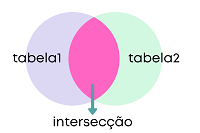


Para utilizar a função:
```sql
SELECT <colunas>
FROM <tabela1>
INNER JOIN <tabela2>
ON <tabela1>.<coluna> = <tabela2>.<coluna>;
``` 

No exemplo:

```sql
SELECT transacoes.id_cliente, cliente.nome
FROM transacoes
INNER JOIN cliente
ON transacoes.id_cliente = cliente.id_cliente;
```

Resultado:

|id_cliente|nome|
|-----|-----|
|1|maria|
|2|valentina|
|1|maria|
|1|maria|
|4|joana
|5|jose|



## 2.2 Função cross

A função cross realiza um cruzamento de dados de duas tabela. É possível unir todas as informações de uma tabela a outra como veremos no exemplo.

```sql
SELECT <colunas>
FROM <tabela1>
CROSS JOIN <tabela2>
```

No exemplo:
```sql
SELECT *
FROM cliente
CROSS JOIN transacoes
```

Parte do resultado: [clique aqui](https://drive.google.com/file/d/1nwjHByagyfL3R2gQm2ALQMverAVmk75J/view?usp=sharing) 



# **3. Junções: left / right**

Nesses dois modelos de junção, todas os dados selecionados de uma tabela serão mostrado enquanto apenas os dados comuns de outra serão selecionados. 

Vamos entender.

##3.1 Junção left

Verifique a imagem abaixo:

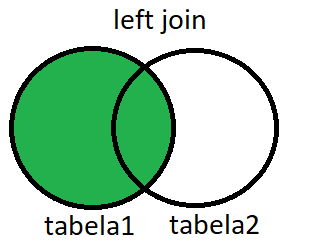

Nesse modelo, todos os dados da **tabela1** são mostrados enquanto apenas os dados da tabela2 que são comuns as duas tabelas são mostrados.

No SQL Server: 

```sql
SELECT <colunas>
FROM <tabela1>
LEFT JOIN <tabela2>
ON <tabela1>.<nomecolunacomum> = <tabela2>.<nomecolunacomum>;
```

Exemplo:


```sql
SELECT *
FROM transacoes
LEFT JOIN cliente 
ON cliente.id_cliente = transacoes.id_cliente;
```

Resultado completo: [clique aqui](https://drive.google.com/file/d/1qoGtmKzNhSLME0igLrhoq-B97KaAj3h7/view?usp=sharing)

## 3.2 Junção right

Verifique a imagem abaixo:

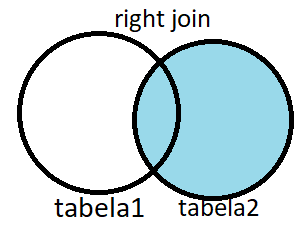

Nesse modelo, todos os dados da **tabela2** são mostrados enquanto apenas os dados da **tabela1** que são comuns as duas tabelas são mostrados.

No SQL Server: 

```sql
SELECT <colunas>
FROM <tabela1>
RIGHT JOIN <tabela2>
ON <tabela1>.<nomecolunacomum> = <tabela2>.<nomecolunacomum>;
```

Exemplo:


```sql
SELECT *
FROM transacoes
RIGHT JOIN cliente 
ON cliente.id_cliente = transacoes.id_cliente;
```

Para ver o resultado: [clique aqui](https://drive.google.com/file/d/1MYKpGh9WW_j-MOVDvPptijTHY5FJSAQG/view?usp=sharing)

> Atenção: o site [SQLiteonline](https://sqliteonline.com/) não possui a função RIGHT JOIN

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 07** | SQL Avançado
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Subqueries;</li>
  <li>Agregações por particionamento</li>
  <li>Visões;</li>
</ol>

---

# **Aulas**

Nessa aula, usaremos a seguinte tabela:

```sql
CREATE TABLE transacoes (
  id_cliente INT, 
  id_transacao INT,
  data_compra DATE,
  valor FLOAT, 
  id_loja varchar(25)
);
```

Também temos os seguintes valores inseridos na tabela

```sql
INSERT INTO transacoes VALUES (1,768805383,'2021-06-10',50.74,'magalu');
INSERT INTO transacoes VALUES (2,768805399,'2021-06-13',30.90,'giraffas');
INSERT INTO transacoes VALUES (3,818770008,'2021-06-05',110.00,'postoshell');
INSERT INTO transacoes VALUES (1,76856563,'2021-07-10',2000.90,'magalu');
INSERT INTO transacoes VALUES (1,767573759,'2021-06-20',15.70,'subway');
INSERT INTO transacoes VALUES (3,818575758,'2021-06-25',2.99,'seveneleven');
INSERT INTO transacoes VALUES (4,764545534,'2021-07-11',50.74,'extra');
INSERT INTO transacoes VALUES (5,76766789,'2021-08-02',10.00,'subway');
INSERT INTO transacoes VALUES (3,8154567758,'2021-08-15',1100.00,'shopee');
```

Como resultado da função SELECT, temos a seguinte tabela:

| id_cliente | id_transacao | data_compra |valor | id_loja |
|------------|----------|----|-----| ------- |
| 1| 768805383    | 2021-06-10    | 50.74 |magalu 
| 2 | 768805399    | 2021-06-13    |  30.90 | giraffas 
| 3 | 818770008    |2021-06-05   |  110.00 |  postoshell  
|1 |76856563 | 2021-07-10 |2000.90 |magalu
|1|767573759|2021-06-20|15.70|subway
| 3|818575758|2021-06-25|2.99|seveneleven
 |4|764545534|2021-07-10|50.74|extra
|5|76766789|2021-08-92|10.00|subway
|3|8154567758|2021-08-15|1100.00|shopee 

Além disso, também utilizaremos a tabela:

```sql
CREATE TABLE cliente (
  id_cliente INT,  
  nome varchar(25),
  data_compra DATE,
  valor_compra float, 
  loja_cadastro varchar(25)
);
```

Teremos os seguintes dados na tabela:

```sql
INSERT INTO cliente VALUES (5,'jose', '2020-07-01',500.43,'magalu');
INSERT INTO cliente VALUES (1,'maria','2019-03-02',150.70,'subway');
INSERT INTO cliente VALUES (2,'valentina','2020-01-09',210.99,'postoshell');
INSERT INTO cliente VALUES (4,'joana','2019-05-11',1300.50,'magalu');
INSERT INTO cliente VALUES (6,'fernando','2020-03-02',86.55,'seveneleven'); 
```

Como resultado temos:

|id_cliente|nome|data_compra|valor_compra|loja_cadastro|
|-|-|-|-|-|
|5|jose|2020-07-01|500.43|cea|
|1|maria|2019-03-02|150.70|riachuelo|
|2|valentina|2020-01-09|210.99|zara|
|4|joana|2019-05-11|1300.50|pontofrio|
|6|fernando|2020-03-02|86.55|pontofrio|

# 1. Subqueries

Podemos resumir o uso de subqueries quando utilizamos um comando dentro do outro. 

Para utilizar, basta inserir um comando 

*  dentro de um SELECT, INSERT, UPDATE ou DELETE
* junto com um operador = , >, <=, >= e LIKE. 
*  aliado a um WHERE, HAVING e FROM

A query *externa* é chamada de **main query** e a interna é chamada de **subquery**.

* a **subquery** deve ser utilizada com  parenteses 
* a **subquery** em geral é executada primeiro!
* é como se a **subquery** fosse um comando condicional associado 
* **subquery** não pode ser associado com ORDER BY

Exemplo teórico:

```sql
SELECT <nome_coluna>
FROM <nome_tabela>
WHERE <nome_coluna> <expressao> <operador>  
    ( SELECT <coluna>  from <tabela>   WHERE ... );
```

Exemplo prático:


```sql
SELECT id_loja, id_cliente, id_transacao from transacoes 
WHERE id_loja IN
(SELECT cliente.loja_cadastro from cliente where cliente.valor_compra > 160 )
```

> **O que ele executa?**

Primeiro a **subquery** é executada.

O resultado de:

```sql
SELECT cliente.loja_cadastro from cliente where cliente.valor_compra > 160
```

|loja_cadastro|
|-|
|magalu|
|postoshell|
|magalu|

Ou seja, vamos considerar apenas essas lojas na seleção da **main query**.

É como se traduzissemos para:
```sql
SELECT id_loja, id_cliente, id_transacao from transacoes 
WHERE id_loja IN
('magalu','postoshell')
```

Resultado: 

|id_loja|id_cliente|id_transacao
|-|-|-|
|magalu|1|768805383|
|postoshell|3|818770008|
|magalu|1|76856563|

Use a criatividade para gerar novas queries com subqueries!


# 2. Agregações por particionamento

Esse é um aspecto do AWS Athena utilizado para organizar e gerar as queries de maneira mais eficiente no framework.

É uma organização hierarquica onde cada *pasta* contem *subpastas* com o rótulo e valores.

> Por que utilizar? 
Para economizar dados carregados no AWS Athena, aumentando a performance reduzindo custos.

> Como fazer?
* No S3, crie uma pasta no AWS com o nome do seu dataset. 
* Vamos supor que queremos separar as lojas na nossa partição. 
* Para isso criamos subpastas:
** transacoes_partition/id_loja=magalu
** transacoes_partition/id_loja=giraffas
** transacoes_partition/id_loja=postoshell
** transacoes_partition/id_loja=subway
** transacoes_partition/id_loja=seveneleven
** transacoes_partition/id_loja=extra
** transacoes_partition/id_loja=shopee

Dentro de cada uma das subpastas, colocamos apenas aquelas informações referentes a id_loja dedicada.

A geração da partição é indicada na hora da **CRIAÇÃO** da tabela com o comando **PARTITIONED by** id_loja (no exemplo).

Depois da criação, é necessário carregas as partições como o comando: 

```sql
CREATE EXTERNAL TABLE transacoes_part(
  id_cliente BIGINT, 
  id_transacoes BIGINT, 
  valor DOUBLE) 
  PARTITIONED BY (id_loja string)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) 
LOCATION 's3://transacoes-partition/'
```


```sql 
MSCK REPAIR TABLE transacoes_part
```

Você pode verificar pela contagem de linhas na tabela completa:

```sql 
select count(*) from transacoes_part
```

A partir disso, nós podemos seguir com os comandos de SELECT que aprendemos nos modulos do curso.

> Mais detalhes na aula prática!

# 3. Visões

Uma visão é uma tabela virtual, não fisica.

Isso significa que toda vez a view é referenciada, ela é também criada. 

> Porque utilizar? 
Ao invés de fazer um SELECT várias vezes, você pode criar uma visão cujos dados são o resultado desse SELECT, ou quando:
* você quer um subconjunto dos seus dados com frequência
* você combina múltiplas tabelas
* você quer simplificar as chamadas de queries


Funções para a visão:


|nome| descrição|
|-|-|
|CREATE VIEW| cria a visão a partir de um select|
|DESCRIBE| mostra a lista de colunas da visão e atributos |
|DROP VIEW| deleta a visão|
|SHOW CREATE VIEW| mostra a query que criou a visao|
|SHOW VIEWS|mostra as visões disponíveis em uma base de dados|
|SHOW COLUMNS| lista as colunas em uma visão|

Mais detalhes [aqui](https://docs.aws.amazon.com/athena/latest/ug/views.html)

> Pratique!



<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 08** | SQL: Projeto Final
Caderno de **Aula**<br> 
Professor [Mariane Neiva](www.linkedin.com/in/mariane-neiva)

---

# **Tópicos**

<ol type="1">
  <li>Introdução aos Kaggle;</li>
  <li>Exploração de dados e análise de dados (EDA)</li>
  <li>Storytelling</li>
</ol>

---

# **1. Plataforma Kaggle**

> **História**

O [Kaggle](https://en.wikipedia.org/wiki/Kaggle) foi fundada em 2010 por [Anthony Goldbloom](https://en.wikipedia.org/wiki/Anthony_Goldbloom) e adquirida em 2017 pelo Google. 

> **O que é?**

É  uma comunidade de programadores (principalmente voltada pra Data Science) que possui diversas bases de dados, competições, códigos e troca de informações entre desenvolvedores. Existem inclusive competições com prêmios e patrocinadas por grandes empresas.

> **Por que utilizar?**

Plataforma mundialmente conhecida, você pode construir seu portfólio por meio de notebooks e descobrir novos datasets. Você também pode utilizar o Kaggle para obter inspirações e ver como outros cientistas de dados/analistas desenvolver suas análises e insights

> **Prática:**

Vamos explorar o Kaggle? Faça sua conta [aqui!](https://www.kaggle.com/)





# **2. Exploração e análise de dados**

> **Por quê?**

* Para entender o que temos na mão, precisamos explorar os dados. 
* Para ter insights sobre os dados, precisamos analisá-los. 

Muitas vezes, é a partir da analise explortatória inicial que conseguimos desenvolver as perguntas de negócio, o ponto chave para a análise de dados! 

> **O que é?**

A exploração de dados é uma investigação das principais características dos dados. Nessa fase, você pode entender:
* variáveis individuais 
* relação entre varíaveis
* quais variáveis são mais importantes 
* quais variáveis tem valores nulos
* como minimizar possíveis erros
* busca de outliers

Na análise de dados, fazemos as perguntas aos dados e utilizamos ferramentas de matemática/estatística para responde-las.  Você pode utilizar funções como:
* análise de distribuição dos dados
* valor médio/desvio
* padrões (análise preditiva)
* maiores/menos vendas dado categorias/condições


> **Pontos chaves para não esquecer**

* Você pode utilizar o Kaggle para ter ideias de como fazer a EDA e a análise de dados 
* *Garbage in, garbage out* -   
* Sempre que puder, visualize graficamente os dados (Você pode utilizar uma linguagem de programação ou o CSV com  o retorno do SELECT no EXCEL) 
* Não há necessidade de usar todos os dados que você tem! Explore as informações, separe as perguntas e use as colunas certas
* As vezes é preciso coletar mais dados. 
* 80% exploração, limpeza e tratamento, 20% análise 

* Não deixe de documentar tudo (falaremos na próxima aula)

> **Prática:** vamos para nosso projeto de EDA + Análise?



# **3. Storytelling**

Não basta apenas codificar, é importante entender, documentar e contar os resultados. 

O processo de comunicação dos resultados é chamada de **storytelling**. 

Mas não é apenas falar os comandos, é sobre **contar uma história**.

É como se você tivesse contando uma história para uma criança mesmo: como problemas, emoção, com descobertas e a mágica no final. [A jornada do herói!](https://pt.wikipedia.org/wiki/Monomito)

Em análise de dados, você pode contar com as ferramentas que você tiver: slides, texto, animações, dashboards, etc. 

Alguns pontos importantes para lembrar no storytelling que tem tudo a ver com a exploração e análise de dados. Apesar das histórias de contos de fada serem floreadas com as cores e detalhes de cada planta na floresta, nem tudo aqui é relevante. 

Escolher o que mostrar e como mostrar pode fazer seu insight ser ou não convincente para quem está ouvindo: ou seja, encontrar o equilibrio entre o que colocar e o que não colocar na sua história de dados é importante!

Para aprofundar, o livro [Storytelling with data](https://www.amazon.com.br/Storytelling-com-Dados-Visualiza%C3%A7%C3%A3o-Profissionais/dp/8550804681/ref=sr_1_1?adgrpid=82022319300&dchild=1&gclid=Cj0KCQjwxdSHBhCdARIsAG6zhlX2Mew8T9Ui09rWJwwYRBgIgj80Ol-yoZlAXSSuID3DF-V8jxJwwJQaAh8DEALw_wcB&hvadid=425954612556&hvdev=c&hvlocphy=1001769&hvnetw=g&hvqmt=e&hvrand=1506147827657889437&hvtargid=kwd-297573901809&hydadcr=5653_11235203&keywords=storytelling+with+data&qid=1626727530&sr=8-1) nos auxilia a escolher os melhores gráficos para contar os resultados e exibi-los da forma mais apropriada!

> **Na prática:** Depois de toda EDA e Análise de dados feita com os dados da parte prática do módulo, conte cada um dos passos em um notebook Kaggle! Você pode inserir gráficos, figuras, explicar o passo-a-passo e o que for necessário para encantar os leitores (ou os recrutadores!).

> Link para o projeto feito na aula [aqui](https://www.kaggle.com/marianeneiva/credit-eda-and-analysis)